In [1]:
%load_ext autoreload
%autoreload 2
from utils import *
import itertools
from IPython.display import display, HTML

In [2]:
BS_row_meta = "/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/exons_matrix/rows_metadata.csv"
BS_row_meta_withvar = "/Users/jiayao/Work/BrainDisorders/src/data/RecGenesExonsTargetedByLGD_wilger2014_predicted.xlsx"
wigler_fam_info = "/Users/jiayao/Work/BrainDisorders/data/nature13908-s2/Supplementary_Table_1.xlsx"
VarFil = "/Users/jiayao/Work/BrainDisorders/data/DenovoVariants/wigler2014RecProLGD.xlsx"

In [3]:
df_row = pd.read_excel(BS_row_meta_withvar, index_col="row_num")
df_row = pd.read_csv(BS_row_meta, index_col="row_num")
df_row["exon length"] = df_row["end"] - df_row["start"]
df_fam = pd.read_excel(wigler_fam_info)
df_var = pd.read_excel(VarFil)

In [4]:
ins = BrainSpan()
# Columns Meta Data
bp_exon_col_meta = pd.read_csv(
    "/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/exons_matrix/columns_metadata.csv", delimiter=",")
bp_exon_col_meta.age.unique()
bp_exon_col_meta["Period"] = bp_exon_col_meta.apply(lambda row: ins.TemporalMap(row["age"])[0], axis=1)
bp_exon_col_meta["Stage"] = bp_exon_col_meta.apply(lambda row: ins.TemporalMap(row["age"])[1], axis=1)
bp_exon_col_meta["Description"] = bp_exon_col_meta.apply(lambda row: ins.TemporalMap(row["age"])[2], axis=1)
# Exon RPKM Norm by Gene RPKM
NormExonExp = pd.read_csv(
    "/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/exons_matrix/NormedExonExpMatrix.csv", header = None)
NormExonExp.head(2)

,0,1,2,3,4,5,6,7,8,9,...,515,516,517,518,519,520,521,522,523,524
0,1,0.92888,0.994602,1.163014,1.058665,0.973158,1.077006,1.026251,0.991086,1.055019,...,1.260625,1.330526,1.289509,1.307571,1.108135,1.232750,1.339092,1.442238,1.217121,1.856548
1,2,2.16143,2.107543,2.173270,2.187017,1.935605,2.438935,2.067446,2.135616,2.197930,...,1.836202,1.777569,2.567087,2.037077,1.840848,1.859284,1.793013,2.138479,1.893857,0.803214


In [5]:
# Exon RPKM Matrix
ExonExp = pd.read_csv("../data/expression/brainspan/exons_matrix/expression_matrix.csv", header=None)
display(ExonExp.head(2))

,0,1,2,3,4,5,6,7,8,9,...,515,516,517,518,519,520,521,522,523,524
0,1,13.636583,40.862901,32.178981,27.939465,29.324584,23.885710,24.887880,16.432391,45.570680,...,4.347437,4.101772,2.987192,3.862508,3.362597,2.566516,3.049593,5.025746,1.893471,8.942586
1,2,31.731240,86.587706,60.131360,57.718046,58.326412,54.090394,50.138146,35.408905,94.937737,...,6.332389,5.479924,5.946744,6.017439,5.585987,3.870925,4.083335,7.451925,2.946266,3.868906


In [6]:
Regionsgt20 = ['OFC', 'VFC', 'HIP', 'ITC', 'AMY', 'DFC', 'STC', 'MFC', 'STR', 'IPC', 
            'V1C', 'S1C', 'A1C', 'M1C', 'CBC', 'MD']
Regions = ["OFC", "VFC", "ITC", "DFC", "STC", "MFC"]

In [7]:
display(df_row.head(2))
display(df_fam.head(2))
print (df_fam.columns.values)
display(df_var.head(2))

,gene_id,ensembl_gene_id,gene_symbol,entrez_id,start,end,exon length
row_num,,,,,,,
1,1086864,ENSG00000000003,TSPAN6,7105.0,99883666,99884983,1317
2,1086864,ENSG00000000003,TSPAN6,7105.0,99885755,99885863,108


,familyId,collection,probandGender,siblingGender,SequencedAtCSHL,SequencedAtUW,SequencedAtYALE,motherRace,fatherRace,probandVIQ,...,fatherAgeInMonthsAtBirthOfProband,motherAgeInMonthsAtBirthOfSibling,fatherAgeInMonthsAtBirthOfSibling,prbRecLGDs,prbLGDs,prbMissense,prbSynonymous,sibLGDs,sibMissense,sibSynonymous
0,11542,ssc,F,F,NaN,"p1,s1",NaN,more-than-one-race,white,121.0,...,430.0,403.0,404.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,13736,ssc,M,M,"p1,s1",NaN,NaN,white,white,119.0,...,400.0,425.0,429.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


['familyId' 'collection' 'probandGender' 'siblingGender' 'SequencedAtCSHL'
 'SequencedAtUW' 'SequencedAtYALE' 'motherRace' 'fatherRace' 'probandVIQ'
 'probandNVIQ' 'motherAgeInMonthsAtBirthOfProband'
 'fatherAgeInMonthsAtBirthOfProband' 'motherAgeInMonthsAtBirthOfSibling'
 'fatherAgeInMonthsAtBirthOfSibling' 'prbRecLGDs' 'prbLGDs' 'prbMissense'
 'prbSynonymous' 'sibLGDs' 'sibMissense' 'sibSynonymous']


,familyId,location,variant,vcfVariant,inChild,fromParent,effectGene,GeneCount,effectType,familyDescription,CSHL,YALE,UW,IossifovWE2012,EichlerWE2012,StateWE2012,EichlerTG2012
0,13545,20:49509095,ins(T),20:49509094:G:GT,pM,NaN,ADNP,2,frame-shift,pM,NaN,strong:valid,NaN,NaN,NaN,NaN,yes
1,12130,20:49510028,del(2),20:49510027:CTT:C,pF,NaN,ADNP,2,frame-shift,pF,NaN,NaN,strong:valid,NaN,yes,NaN,NaN


In [8]:
def sameExon(var1, var2, gene, row_meta):
    gene_df = row_meta[row_meta["gene_symbol"]==gene]
    pos_1 = int(var1.split(":")[1])
    pos_2 = int(var2.split(":")[1])
    exon_1, exon_2 = None, None
    for i, row in gene_df.iterrows():
        start = int(row["start"]) - 2
        end = int(row["end"]) + 2
        if pos_1 >= start and pos_1 <= end:
            exon_1 = i
        if pos_2 >= start and pos_2 <= end:
            exon_2 = i
    return (exon_1 == exon_2) and (exon_1 != None) and (exon_2 != None)

def get_exon_id(var, gene, row_meta):
    gene_df = row_meta[row_meta["gene_symbol"]==gene]
    pos = int(var.split(":")[1])
    for i, row in gene_df.iterrows():
        start = int(row["start"]) - 2
        end = int(row["end"]) + 2
        if pos >= start and pos <= end:
            return i
    return None
def isLastExon(exon_id, row_meta):
    gene = row_meta.get_value(exon_id, "gene_symbol")
    next_gene = row_meta.get_value(exon_id+1, "gene_symbol")
    return not (gene == next_gene)
#Group all the LoF to gene
Gene2Vars = {}
Genes = list(set(df_var["effectGene"].values))
VIQ_sg_diffs = np.array([])
NVIQ_sg_diffs = np.array([])
VIQ_se_diffs = np.array([])
NVIQ_se_diffs = np.array([])
for gene in Genes:
    tmp_df = df_var[df_var["effectGene"]==gene]
    famids = tmp_df["familyId"]
    varids = tmp_df["location"]
    pairs = list(itertools.combinations(zip(famids, varids), 2)) #Get var pair
    #print tmp_df.shape, len(famids)
    #print pairs
    for pair in pairs:
        (fam1,var1), (fam2,var2) = pair
        exon_1, exon_2 = get_exon_id(var1, gene, df_row), get_exon_id(var2, gene, df_row)
        if exon_1 == None or exon_2 == None:
            continue
        if isLastExon(exon_1, df_row) or isLastExon(exon_2, df_row):
            continue
        VIQ_diff  = abs( float(df_fam[df_fam["familyId"] == fam1]["probandVIQ"].values[0]) - 
                         float(df_fam[df_fam["familyId"] == fam2]["probandVIQ"].values[0]) )
        NVIQ_diff = abs( float(df_fam[df_fam["familyId"] == fam1]["probandNVIQ"].values[0]) - 
                         float(df_fam[df_fam["familyId"] == fam2]["probandNVIQ"].values[0]) )
        if sameExon(var1, var2, gene, df_row): #same exon
            VIQ_se_diffs = np.append(VIQ_se_diffs, VIQ_diff)
            NVIQ_se_diffs = np.append(NVIQ_se_diffs, NVIQ_diff)
        VIQ_sg_diffs = np.append(VIQ_sg_diffs, VIQ_diff)
        NVIQ_sg_diffs = np.append(NVIQ_sg_diffs, NVIQ_diff)    
        #print NVIQ_diffs
        #print VIQ_diffs
#print VIQ_diffs
#print NVIQ_sg_diffs

/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


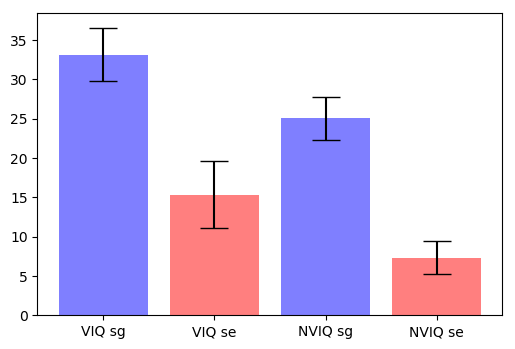

In [9]:
VIQ_sg_mean = np.mean(VIQ_sg_diffs)
VIQ_sg_mean_var = np.std(VIQ_sg_diffs)/math.sqrt(VIQ_sg_diffs.size)
VIQ_se_mean = np.mean(VIQ_se_diffs)
VIQ_se_mean_var = np.std(VIQ_se_diffs)/math.sqrt(VIQ_se_diffs.size)
NVIQ_sg_mean = np.mean(NVIQ_sg_diffs)
NVIQ_sg_mean_var = np.std(NVIQ_sg_diffs)/math.sqrt(NVIQ_sg_diffs.size)
NVIQ_se_mean = np.mean(NVIQ_se_diffs)
NVIQ_se_mean_var = np.std(NVIQ_se_diffs)/math.sqrt(NVIQ_se_diffs.size)

materials = ['VIQ sg', 'VIQ se', 'NVIQ sg', 'NVIQ se']
x_pos = np.arange(len(materials))
CTEs = [VIQ_sg_mean, VIQ_se_mean, NVIQ_sg_mean, NVIQ_se_mean]
error = [VIQ_sg_mean_var, VIQ_se_mean_var,NVIQ_sg_mean_var, NVIQ_se_mean_var]

fig, ax = plt.subplots(dpi=100)

ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, color = ['b','r','b','r'], ecolor='black', capsize=10)
ax.set_xticks(x_pos)
ax.set_xticklabels(materials)
plt.show()

In [10]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import scipy
def regGene(dat):
    regr = linear_model.LinearRegression(fit_intercept=False)
    X_train = np.array([[x[4]] for x in dat])
    y_train = np.array([x[3] for x in dat])
    regr.fit(X_train, y_train)
    return regr
def plotGene(gene, regr, dat):
    X_train = np.array([[x[4]] for x in dat])
    y_train = np.array([x[3] for x in dat])
    y_pred = regr.predict(X_train)
    #print('Coefficients:', regr.coef_)
    R, P = scipy.stats.pearsonr([x[0] for x in X_train], y_train)
    plt.title("Gene:{}, R:{}, P:{}".format(gene, R,P))
    plt.xlim(0,3)
    plt.ylim(0, max(y_train+y_pred))
    plt.scatter(X_train, y_train,  color='black')
    plt.plot(np.append(X_train, [0]), np.append(y_pred, 0), color='blue', linewidth=3)
    plt.show()

In [11]:
def getIQ(famID, which="probandNVIQ"):
    return float(df_fam[df_fam["familyId"] == famID][which].values[0])
def avgseq(seq, start, end):
    if seq == None:
        return None
    return np.mean(seq[start: end])

gene = "KATNAL2"
tmp_df = df_var[df_var["effectGene"]==gene]
famids = tmp_df["familyId"]
varids = tmp_df["location"]
#display(tmp_df)
exonids = [get_exon_id(x, gene, df_row) for x in varids]
rel_exps = []
for exonid in exonids:
    try:
        seq,error,mdeian = ins.LoadingDat2SeqCrossRecordCrossRegion([exonid],Regionsgt20,
                                                                    df_row,bp_exon_col_meta,NormExonExp)
    except:
        seq = None
    rel_exp = avgseq(seq, 0, 10)
    rel_exps.append(rel_exp)
IQs = [max(0, (100-getIQ(x))) for x in famids]
#exonids = [x for x in exonids if x!=None]
dat = zip(famids, varids, exonids, IQs, rel_exps)
dat = [x for x in dat if x[2]!= None]
print (dat)

[(11008, '18:44589733', 168790, 0, 1.6470324185140008), (11872, '18:44603833', 168795, 35.0, 2.149268643236931)]


/Users/jiayao/Work/BrainDisorders/src/utils.py:1028: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  exp = Matrix.get_value(_id-1, row["column_num"])


In [12]:
Regionsgt20 = ['OFC', 'VFC', 'HIP', 'ITC', 'AMY', 'DFC', 'STC', 'MFC', 'STR', 'IPC', 
            'V1C', 'S1C', 'A1C', 'M1C', 'CBC', 'MD']
    
# linear_model for each gene
gene2slope = {}
ALL_RelExp = np.array([])
ALL_Normed_IQD = np.array([])
for gene in Genes:
    tmp_df = df_var[df_var["effectGene"]==gene]
    famids = tmp_df["familyId"]
    varids = tmp_df["location"]
    exonids = [get_exon_id(x, gene, df_row) for x in varids]
    exonids = [x for x in exonids if x != None]
    #print exonids
    exonids = [x for x in exonids if not isLastExon(x, df_row)]
    rel_exps = []
    for exonid in exonids:
        try:
            seq,error,mdeian = ins.LoadingDat2SeqCrossRecordCrossRegion([exonid],Regionsgt20,
                                                                        df_row,bp_exon_col_meta,NormExonExp)
        except:
            seq = None
        rel_exp = avgseq(seq, 0, 3)
        rel_exps.append(rel_exp)
    IQs = [max(0, (100-getIQ(x))) for x in famids]
    #exonids = [x for x in exonids if x!=None]
    dat = zip(famids, varids, exonids, IQs, rel_exps)
    dat = [x for x in dat if x[2]!= None]
    rel_exps = np.array([[x[4]] for x in dat])
    
    IQDs = np.array([x[3] for x in dat])
    if dat == []:
        continue
    regr = regGene(dat)
    slope = regr.coef_[0]
    if slope == 0:
        continue
    gene2slope[gene] = slope
    ALL_RelExp = np.append(ALL_RelExp, rel_exps)
    NormIQDs = np.array([x[3]/slope for x in dat])
    ALL_Normed_IQD = np.append(ALL_Normed_IQD, NormIQDs)
    #print NormIQDs
    #plotGene(gene, regr, dat)
    

/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/jiayao/Work/BrainDisorders/src/utils.py:1028: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  exp = Ma

/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/jiayao/Work/BrainDisorders/src/utils.py:1028: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  exp = Matrix.get_value(_id-1, row["column_num"])
/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: get_value is deprecated and will be removed in a future release. Plea

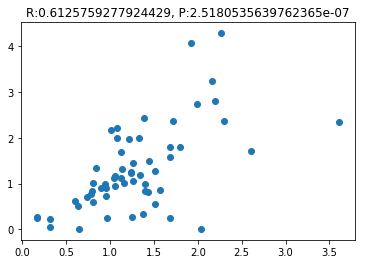

In [13]:
model = linear_model.LinearRegression(fit_intercept=False)
ALL_RelExp = ALL_RelExp.reshape(-1,1)
R, P = scipy.stats.pearsonr([x[0] for x in ALL_RelExp], ALL_Normed_IQD) 
plt.title("R:{}, P:{}".format(R,P))
model.fit(ALL_RelExp, ALL_Normed_IQD)
plt.scatter(ALL_RelExp, ALL_Normed_IQD)
#plt.plot([0, 3], [0,model.predict(3.0)], color='red')
plt.show()

/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/jiayao/Work/BrainDisorders/src/utils.py:1028: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  exp = Matrix.get_value(_id-1, row["column_num"])
/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: get_value is deprecated and will be removed in a future release. Plea

/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/jiayao/Work/BrainDisorders/src/utils.py:1028: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  exp = Matrix.get_value(_id-1, row["column_num"])
/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: get_value is deprecated and will be removed in a future release. Plea

ValueError: Expected 2D array, got scalar array instead:
array=9.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

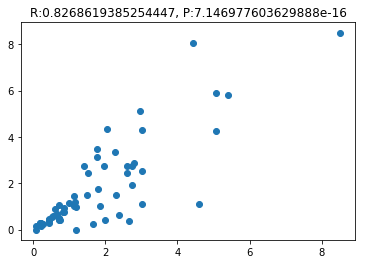

In [14]:
Regionsgt20 = ['OFC', 'VFC', 'HIP', 'ITC', 'AMY', 'DFC', 'STC', 'MFC', 'STR', 'IPC', 
            'V1C', 'S1C', 'A1C', 'M1C', 'CBC', 'MD']
    
# linear_model for each gene
gene2slope = {}
ALL_RelExp = np.array([])
ALL_Normed_IQD = np.array([])
for gene in Genes:
    tmp_df = df_var[df_var["effectGene"]==gene]
    famids = tmp_df["familyId"]
    varids = tmp_df["location"]
    exonids = [get_exon_id(x, gene, df_row) for x in varids]
    exonids = [x for x in exonids if x != None]
    #print exonids
    exonids = [x for x in exonids if not isLastExon(x, df_row)]
    rel_exps = []
    for exonid in exonids:
        try:
            seq,error,mdeian = ins.LoadingDat2SeqCrossRecordCrossRegion([exonid],Regionsgt20,
                                                                        df_row,bp_exon_col_meta,ExonExp)
        except:
            seq = None
        rel_exp = avgseq(seq, 0, 3)  ####################################
        #rel_exp = math.log(rel_exp + 1, 10)
        rel_exp = rel_exp/10
        rel_exps.append(rel_exp)
    IQs = [max(0, (100-getIQ(x))) for x in famids]
    #exonids = [x for x in exonids if x!=None]
    dat = zip(famids, varids, exonids, IQs, rel_exps)
    dat = [x for x in dat if x[2]!= None]
    rel_exps = np.array([[x[4]] for x in dat])
    
    IQDs = np.array([x[3] for x in dat])
    if dat == []:
        continue
    regr = regGene(dat)
    slope = regr.coef_[0]
    if slope == 0:
        continue
    gene2slope[gene] = slope
    ALL_RelExp = np.append(ALL_RelExp, rel_exps)
    NormIQDs = np.array([x[3]/slope for x in dat])
    ALL_Normed_IQD = np.append(ALL_Normed_IQD, NormIQDs)
    #print NormIQDs
    #plotGene(gene, regr, dat)
    
model = linear_model.LinearRegression(fit_intercept=False)
ALL_RelExp = ALL_RelExp.reshape(-1,1)
R, P = scipy.stats.pearsonr([x[0] for x in ALL_RelExp], ALL_Normed_IQD) 
plt.title("R:{}, P:{}".format(R,P))
model.fit(ALL_RelExp, ALL_Normed_IQD)
plt.scatter(ALL_RelExp, ALL_Normed_IQD)
#plt.plot([0, 3], [0, model.predict(3.0)], color='red')
plt.plot([0, 9], [0, model.predict(9)], color='red')
plt.show()

In [ ]:
import random
import bisect
import collections

def cdf(weights):
    total = sum(weights)
    result = []
    cumsum = 0
    for w in weights:
        cumsum += w
        result.append(cumsum / total)
    return result

def choice(population, weights):
    assert len(population) == len(weights)
    cdf_vals = cdf(weights)
    x = random.random()
    idx = bisect.bisect(cdf_vals, x)
    return population[idx]

weights=[0.3, 0.2, 0.5]
population = ['A', 'B','D']
counts = collections.defaultdict(int)
for i in range(10000):
    counts[choice(population, weights)] += 1
print(counts)

In [ ]:
def GetExonProb(exon_df):
    Total_length = sum(exon_df["exon length"].values)
    Probs = [float(x)/Total_length for x in exon_df["exon length"].values]
    return exon_df.index.values, Probs

In [ ]:
gene = "CHD8"
tmp_df = df_row[df_row["gene_symbol"]==gene]
population, weights = GetExonProb(tmp_df)
#print population, weights, tmp_df["exon length"].values, sum(tmp_df["exon length"].values)
counts = collections.defaultdict(int)
for i in range(6):
    counts[choice(population, weights)] += 1
print(counts)

# Oberved

In [ ]:
exon_exp_avg2time = pd.read_csv("/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/exons_matrix/exon_exp_avg2time.csv", index_col="column_num")
exon_exp_avg2time.head()

In [ ]:
exon_ralexp_avg2time = pd.read_csv("/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/exons_matrix/exon_ralexp_avg2time.csv", index_col="column_num")
exon_ralexp_avg2time.head()

In [ ]:
rel_pre = PredictIQFromExon(VarFil, wigler_fam_info, exon_exp_avg2time)
rel_pre.model(df_row)

In [ ]:
rel_pre = PredictIQFromExon(VarFil, wigler_fam_info, exon_ralexp_avg2time)
rel_pre.LoadData(df_row, time_start=1, time_end=4)
rel_pre.model2(plot=True)

In [ ]:
abs_pre = PredictIQFromExon(VarFil, wigler_fam_info, exon_exp_avg2time)
abs_pre.LoadData(df_row, time_start=1, time_end=4)
abs_pre.model2(plot=True)

# Prediction

In [ ]:
rel_pre = PredictIQFromExon(VarFil, wigler_fam_info, exon_ralexp_avg2time)
abs_pre = PredictIQFromExon(VarFil, wigler_fam_info, exon_exp_avg2time)
diffs1 = []
for s, e in [(0,12), (0,6), (1,4), (6,12), ('min', 'min'), ('max', 'max')]:
    if s in ['min', 'max']:
        rel_pre.LoadData(df_row, method = s)
    else:
        rel_pre.LoadData(df_row, time_start=s, time_end=e)
    rel_pre.model2()
    diff = []
    for varid, var in rel_pre.VarList.items():
        IQ = 100 - var.ProbandIQ
        rel_pre.model2(plot=False, var2leave=varid)
        if var.Gene not in rel_pre.gene2slope:
            continue
        IQD_pre = rel_pre.Predict(var)
        IQ_pre = 100 - IQD_pre
        diff.append(abs(IQ-IQ_pre))
    diffs1.append(np.array(diff))
diffs2 = []
for s, e in [(0,12), (0,6), (1,4), (6,12), ('min', 'min'), ('max', 'max')]:
    if s in ['min', 'max']:
        abs_pre.LoadData(df_row, method = s)
    else:
        abs_pre.LoadData(df_row, time_start=s, time_end=e)
    abs_pre.model2()
    diff = []
    for varid, var in abs_pre.VarList.items():
        IQ = 100 - var.ProbandIQ
        abs_pre.model2(plot=False, var2leave=varid)
        if var.Gene not in abs_pre.gene2slope:
            continue
        IQD_pre = abs_pre.Predict(var)
        IQ_pre = 100 - IQD_pre
        diff.append(abs(IQ-IQ_pre))
    diffs2.append(np.array(diff))
for i in diffs1+diffs2:
    print np.median(i),
plt.boxplot(diffs1+diffs2, labels = ["rel 0-11", "rel 0-5", "rel 2-4", "rel 6-11", "rel min", "rel max" ,
                                     "abs 0-11", "abs 0-5", "abs 2-4", "abs 6-11", "abs min", "abs max"])
plt.show()

In [ ]:
rel_pre = PredictIQFromExon(VarFil, wigler_fam_info, exon_ralexp_avg2time)
diffs = []
times = [(x,x+1) for x in xrange(0,12)]
for s, e in [(0,12), (0,6), (6,12)] + times:
    print s,e
    if s in ['min', 'max']:
        rel_pre.LoadData(df_row, method = s)
    else:
        rel_pre.LoadData(df_row, time_start=s, time_end=e)
    rel_pre.model2(plot=False)
    diff = []
    for varid, var in rel_pre.VarList.items():
        IQ = 100 - var.ProbandIQ
        rel_pre.model2(plot=False, var2leave=varid)
        if var.Gene not in rel_pre.gene2slope:
            continue
        IQD_pre = rel_pre.Predict(var)
        IQ_pre = 100 - IQD_pre
        diff.append(abs(IQ-IQ_pre))
    diffs.append(np.array(diff))
plt.boxplot(diffs, labels = ["0-11", "0-5", "6-11"] + [x for x in xrange(0,12)])
plt.show()

In [ ]:
fig = plt.figure(dpi=100)
fig.patch.set_facecolor('xkcd:white')
plt.boxplot(diffs, labels = ["All stages", "Prenatal", "Postnatal"] + 
            ins.Descriptions, showfliers=False)
plt.xticks(rotation=60)
plt.ylim(-1, 60)
plt.xlabel
mpl.style.use('default')
plt.grid(False)
plt.xlabel("Developmental stages")
plt.ylabel("Nonverbal IQ Prediction Error")
#plt.show()
fig.savefig("predictionerror.pdf", bbox_inches='tight')

In [ ]:
rel_pre1 = PredictIQFromExon(VarFil, wigler_fam_info, exon_ralexp_avg2time)
rel_pre1.LoadData(df_row, time_start=1, time_end=4)
rel_pre1.model2(plot=True)

In [ ]:
slopes = []
for gene, slope in rel_pre1.gene2slope.items():
    print gene, slope
    slopes.append(slope)
print np.median(slope)
plt.hist(slopes)
plt.show()

In [ ]:
wigler2014ProbandLGD = pd.read_excel("/Users/jiayao/Work/BrainDisorders/data/DenovoVariants/wigler2014ProLGD.xlsx")
display(wigler2014ProbandLGD.head(2))
wigler2014ProbandPhenotype = pd.read_excel("/Users/jiayao/Work/BrainDisorders/data/nature13908-s2/Supplementary_Table_1.xlsx")
display(wigler2014ProbandPhenotype.head(2))
wigler2014ProbandLGDExonMeta = pd.read_excel("/Users/jiayao/Work/BrainDisorders/src/GenesExonsTargetedByLGD_wilger2014_predicted.xlsx")
display(wigler2014ProbandLGDExonMeta.head(2))

In [ ]:
LGD_genes = list(set(wigler2014ProbandLGD["effectGene"].values))
print len(LGD_genes)
entrez_symbol_map = get_gene_entrez_symbol_map()
wigler_predicted_lgd_genes = set([entrez_symbol_map[x.strip()] for x in file(wigler_predicted_lgd)])
wigler2014ProbandLGD_predicted = wigler2014ProbandLGD[wigler2014ProbandLGD["effectGene"].isin(wigler_predicted_lgd_genes)]
wigler_LGD_genes = list(set(wigler2014ProbandLGD_predicted["effectGene"].values))
print len(wigler_LGD_genes)

In [ ]:
wigler2014ProbandLGD_predicted.head(2)
wigler2014ProbandLGD_predicted_fams = wigler2014ProbandLGD_predicted["familyId"].values

In [ ]:
#Overall distributioin
VIQ = wigler2014ProbandPhenotype["probandVIQ"].values
VIQ = VIQ[~np.isnan(VIQ)]
VIQ_male = wigler2014ProbandPhenotype[wigler2014ProbandPhenotype["probandGender"]=="M"]["probandVIQ"].values
VIQ_male = VIQ_male[~np.isnan(VIQ_male)]
VIQ_Female = wigler2014ProbandPhenotype[wigler2014ProbandPhenotype["probandGender"]=="F"]["probandVIQ"].values
VIQ_Female = VIQ_Female[~np.isnan(VIQ_Female)]
bins = [x*5 for x in xrange(35)]
plt.hist(VIQ_male, normed=1, bins = bins, alpha=0.4, color='red', label="male")
plt.hist(VIQ_Female, normed=1, bins = bins, alpha=0.4, color='blue', label="female")
plt.axvline(x=70, color='black')
plt.legend()
plt.title("All SSC VIQ")
print np.mean(VIQ_male), np.mean(VIQ_Female)
plt.show()

In [ ]:
#Overall distributioin
VIQ = wigler2014ProbandPhenotype["probandNVIQ"].values
VIQ = VIQ[~np.isnan(VIQ)]
VIQ_male = wigler2014ProbandPhenotype[wigler2014ProbandPhenotype["probandGender"]=="M"]["probandNVIQ"].values
VIQ_male = VIQ_male[~np.isnan(VIQ_male)]
VIQ_Female = wigler2014ProbandPhenotype[wigler2014ProbandPhenotype["probandGender"]=="F"]["probandNVIQ"].values
VIQ_Female = VIQ_Female[~np.isnan(VIQ_Female)]
bins = [x*5 for x in xrange(35)]
plt.hist(VIQ_male, normed=1, bins = bins, alpha=0.4, color='red', label="male")
plt.hist(VIQ_Female, normed=1, bins = bins, alpha=0.4, color='blue', label="female")
plt.axvline(x=70, color='black')
plt.legend()
plt.title("All SSC NVIQ")
print np.mean(VIQ_male), np.mean(VIQ_Female)
plt.show()

In [ ]:
wigler2014ProbandwithLGDPhenotype = wigler2014ProbandPhenotype[wigler2014ProbandPhenotype["familyId"].isin(wigler2014ProbandLGD_predicted_fams)]
VIQ = wigler2014ProbandwithLGDPhenotype["probandVIQ"].values
VIQ = VIQ[~np.isnan(VIQ)]
VIQ_male = wigler2014ProbandwithLGDPhenotype[wigler2014ProbandwithLGDPhenotype["probandGender"]=="M"]["probandVIQ"].values
VIQ_male = VIQ_male[~np.isnan(VIQ_male)]
VIQ_Female = wigler2014ProbandwithLGDPhenotype[wigler2014ProbandwithLGDPhenotype["probandGender"]=="F"]["probandVIQ"].values
VIQ_Female = VIQ_Female[~np.isnan(VIQ_Female)]
bins = [x*5 for x in xrange(35)]
plt.hist(VIQ_male, normed=1, bins = bins, alpha=0.4, color='red', label="male")
plt.hist(VIQ_Female, normed=1, bins = bins, alpha=0.4, color='blue', label="female")
plt.axvline(x=70, color='black')
plt.legend()
plt.title("predicted LGD SSC VIQ")
plt.show()

In [ ]:
wigler2014ProbandwithLGDPhenotype = wigler2014ProbandPhenotype[wigler2014ProbandPhenotype["familyId"].isin(wigler2014ProbandLGD_predicted_fams)]
VIQ = wigler2014ProbandwithLGDPhenotype["probandNVIQ"].values
VIQ = VIQ[~np.isnan(VIQ)]
VIQ_male = wigler2014ProbandwithLGDPhenotype[wigler2014ProbandwithLGDPhenotype["probandGender"]=="M"]["probandNVIQ"].values
VIQ_male = VIQ_male[~np.isnan(VIQ_male)]
VIQ_Female = wigler2014ProbandwithLGDPhenotype[wigler2014ProbandwithLGDPhenotype["probandGender"]=="F"]["probandNVIQ"].values
VIQ_Female = VIQ_Female[~np.isnan(VIQ_Female)]
bins = [x*5 for x in xrange(35)]
plt.hist(VIQ_male, normed=1, bins = bins, alpha=0.4, color='red', label="male")
plt.hist(VIQ_Female, normed=1, bins = bins, alpha=0.4, color='blue', label="female")
plt.axvline(x=70, color='black')
plt.legend()
plt.title("predicted LGD SSC NVIQ")
plt.show()

# Permute

In [360]:
Genes = list(set(df_var["effectGene"].values))
#Get IQ of each genes
Gene2num = []
for gene in Genes:
    
Rs = []
for i in xrange(1000):
    gene2slope = {}
    ALL_RelExp = np.array([])
    ALL_Normed_IQD = np.array([])
    for gene in Genes:
        tmp_df = df_var[df_var["effectGene"]==gene]
        famids = tmp_df["familyId"]
        varids = tmp_df["location"]
        exonids = [get_exon_id(x, gene, df_row) for x in varids]
        exonids = [x for x in exonids if x != None]
        #print exonids
        exonids = [x for x in exonids if not isLastExon(x, df_row)]
        rel_exps = []
        for exonid in exonids:
            seq = exon_ralexp_avg2time.iloc[exonid-1, 0:12].values
            #print seq
            rel_exp = avgseq(seq, 0, 12)
            rel_exps.append(rel_exp)
        IQs = [max(0, (100-getIQ(x))) for x in famids]
        #exonids = [x for x in exonids if x!=None]
        dat = zip(famids, varids, exonids, IQs, rel_exps)
        dat = [x for x in dat if x[2]!= None]
        rel_exps = np.array([[x[4]] for x in dat])

        IQDs = np.array([x[3] for x in dat])
        if dat == []:
            continue
        regr = regGene(dat)
        slope = regr.coef_[0]
        if slope == 0:
            continue
        gene2slope[gene] = slope
        ALL_RelExp = np.append(ALL_RelExp, rel_exps)
        NormIQDs = np.array([x[3]/slope for x in dat])
        ALL_Normed_IQD = np.append(ALL_Normed_IQD, NormIQDs)
    
    model = linear_model.LinearRegression(fit_intercept=False)
    ALL_RelExp = ALL_RelExp.reshape(-1,1)
    R, P = scipy.stats.pearsonr([x[0] for x in ALL_RelExp], ALL_Normed_IQD) 
    Rs.append(R)

IndentationError: expected an indented block (<ipython-input-360-e6ea6010ef4a>, line 6)